In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/content/drive/MyDrive/Googlecolab/Trend2024/kaggle_trends_2024.csv")

df.head()

,trend_id,trend_name,category,date,weekly_interest,region,sentiment,related_brands,growth_rate,forecast_2025
0,1000,ESG Investing,Tech,2024-06-13,35,China,0.21,"Tesla, BlackRock",14.5,76
1,1001,DeFi 2.0,Finance,2024-01-10,20,China,0.70,"BlackRock, Tesla",9.1,89
2,1002,Green Hydrogen,Finance,2023-06-30,15,India,0.40,"Nike, BlackRock",8.1,54
3,1003,Green Hydrogen,Tech,2023-03-07,3,India,-0.31,"Tesla, OpenAI",17.1,85
4,1004,Green Hydrogen,Tech,2024-09-04,25,USA,0.33,"OpenAI, Tesla",17.7,54


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   trend_id         10000 non-null  int64  
 1   trend_name       10000 non-null  object 
 2   category         10000 non-null  object 
 3   date             10000 non-null  object 
 4   weekly_interest  10000 non-null  int64  
 5   region           10000 non-null  object 
 6   sentiment        10000 non-null  float64
 7   related_brands   10000 non-null  object 
 8   growth_rate      10000 non-null  float64
 9   forecast_2025    10000 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 781.4+ KB


In [15]:
print("\nMissing values:\n", df.isnull().sum())


Missing values:
 trend_id           0
trend_name         0
category           0
date               0
weekly_interest    0
region             0
sentiment          0
related_brands     0
growth_rate        0
forecast_2025      0
dtype: int64


In [16]:
print("\nJumlah duplikat:", df.duplicated().sum())


Jumlah duplikat: 0


In [17]:
# Ubah kolom tanggal ke datetime
df['date'] = pd.to_datetime(df['date'])

# Buat kolom tahun
df['year'] = df['date'].dt.year

<ipython-input-23-dee9208ba118>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_trends.values, y=top_trends.index, palette='viridis')


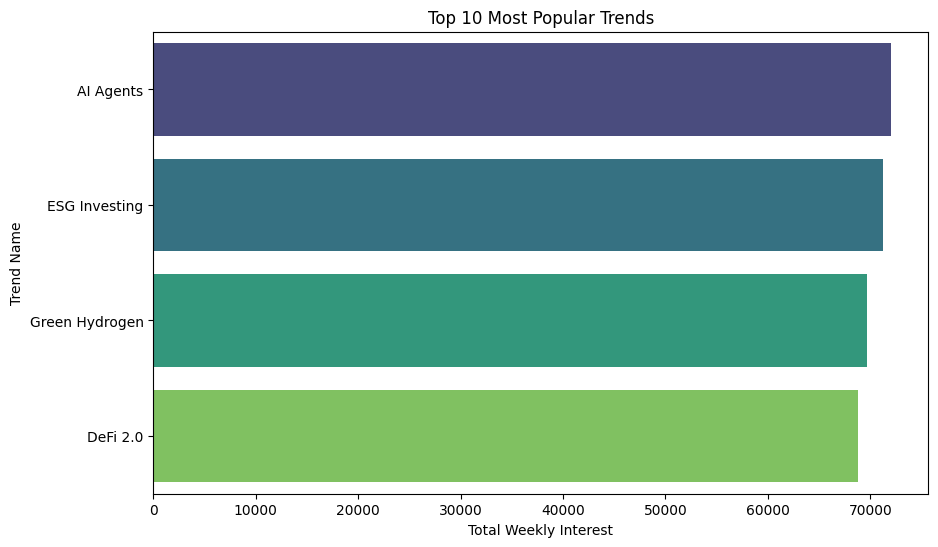

In [23]:
top_trends = df.groupby('trend_name')['weekly_interest'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_trends.values, y=top_trends.index, palette='viridis')
plt.title("Top 10 Most Popular Trends")
plt.xlabel("Total Weekly Interest")
plt.ylabel("Trend Name")
plt.show()


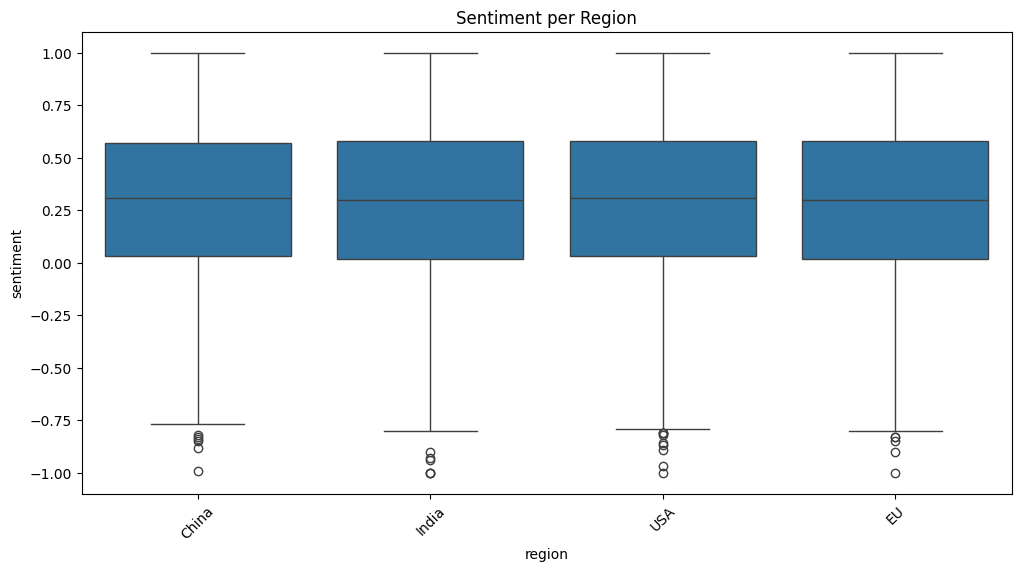

In [24]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='region', y='sentiment')
plt.title("Sentiment per Region")
plt.xticks(rotation=45)
plt.show()

<ipython-input-26-361e40bf266d>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=brand_counts, y=brand_names, palette='magma')


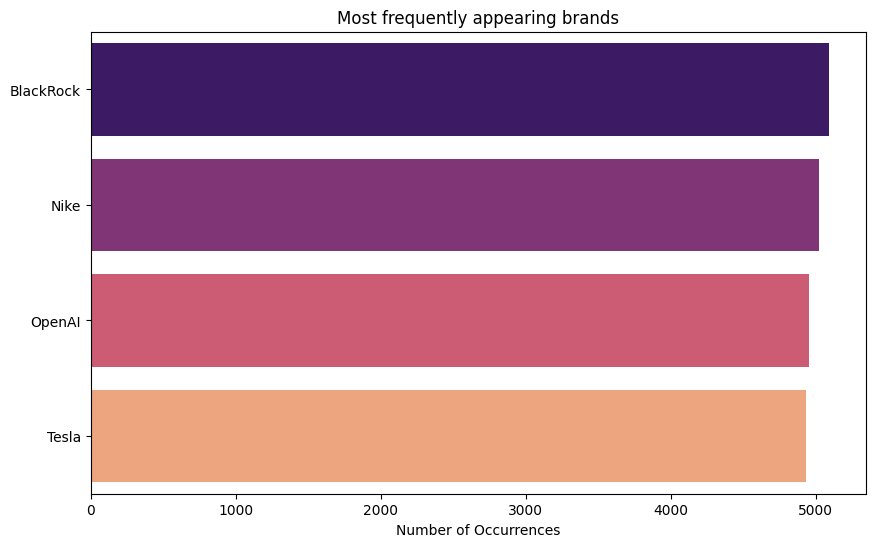

In [26]:
from collections import Counter

brands = df['related_brands'].str.split(', ')
brand_list = [brand for sublist in brands for brand in sublist]
top_brands = Counter(brand_list).most_common(10)

brand_names, brand_counts = zip(*top_brands)
plt.figure(figsize=(10,6))
sns.barplot(x=brand_counts, y=brand_names, palette='magma')
plt.title("Most frequently appearing brands")
plt.xlabel("Number of Occurrences")
plt.show()
